**Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек**.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и *какие гипотезы на ее основе можно выдвинуть*.

**Откуда брать данные?**

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, [kaggle.com](https://www.kaggle.com/)). Если идей нет, можете взять один из перечисленных ниже:

* [Данные IMDB](https://www.kaggle.com/tmdb/tmdb-movie-metadata);
* [Данные NYC](https://www.kaggle.com/c/nyc-taxi-trip-duration);
* [Данные NBA](https://www.kaggle.com/drgilermo/nba-players-stats).

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
NBA_data = pd.read_csv('player_data.csv')
NBA_data['career time'] = NBA_data['year_end'] - NBA_data['year_start']
NBA_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college,career time
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,9
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,5


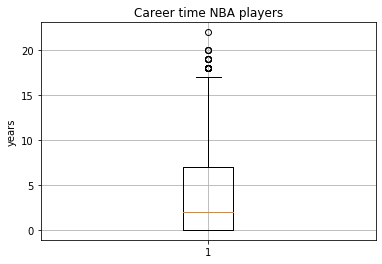

In [10]:
# Строю визулализацию разброса продолжиетельности карьеры (в годах) игроков NBA. Серединное значение продолжительности карьеры 
# ~ 2 года, размах продолжительности карьеры (25% и 75% процентили) от 0 полных лет (совпадает с миниальным значением выборки) 
# до ~ 7 лет, максимальное значение продолжительности карьеры (повторяющееся значение) ~ 17 лет. Выбросы/редкие значения 
# продолжительности карьеры находятся межу 18 и 24 годами. 
plt.boxplot(NBA_data['career time'])
plt.title('Career time NBA players')
plt.ylabel('years')
plt.grid()

In [11]:
top_10_cars = pd.read_csv('data-Xqap7.csv').head(10)
top_10_cars.head()

,rank,brand,model,brand_model,qnt
0,1,Lada,Vesta,Lada Vesta,7585
1,2,Volkswagen,Polo,Volkswagen Polo,5804
2,3,Geely,Atlas,Geely Atlas,3320
3,4,Kia,Rio,Kia Rio,2906
4,5,Lada,XRAY,Lada XRAY,2839


Text(0.5, 0, 'quantity, units')

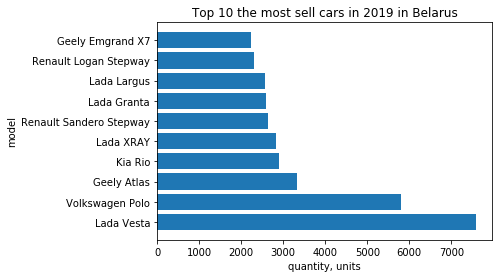

In [12]:
# Визуализация 10 самых продаваемых в 2019г. марок автомобилей
plt.barh(top_10_cars['brand_model'], top_10_cars['qnt'])
plt.title('Top 10 the most sell cars in 2019 in Belarus')
plt.ylabel('model')
plt.xlabel('quantity, units')

In [13]:
import seaborn as sns
import numpy as np

In [14]:
employees = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
employees.head()
# employees.info()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


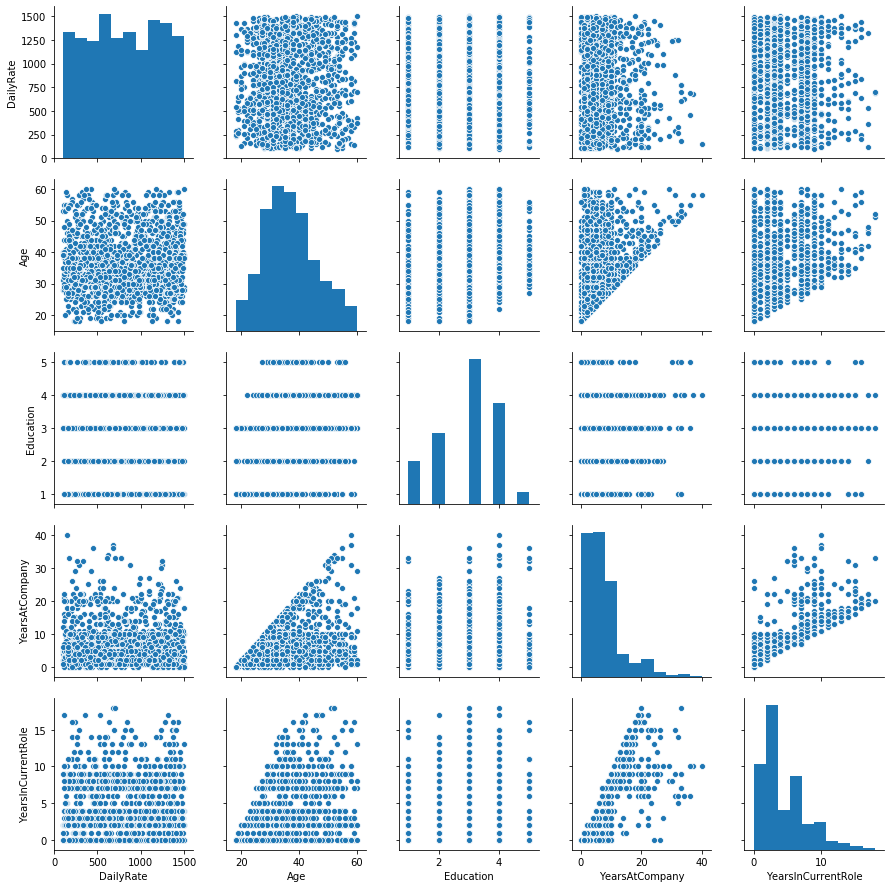

In [6]:
# Строю визуализацию, чтобы посмотреть как связан размер дневного дохода работника от параметров: возраст, образование, 
# время в компании, время на текущей позиции 
employees_plot = sns.pairplot(employees[['DailyRate', 'Age','Education', 'YearsAtCompany', 'YearsInCurrentRole']])
employees_plot

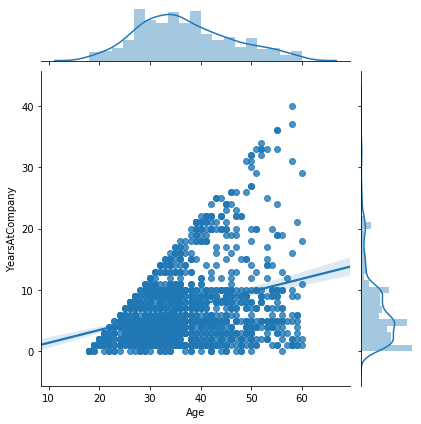

In [7]:
# строю визуализацию, чтобы увидеть как свзязаны возраст сторутдников и время работы в компании
sns.jointplot(x='Age', y='YearsAtCompany', data=employees, kind='reg')

In [15]:
# строю визуализацию, чтобы посмотреть какой уровень среднего дневного доходода был у работников в зависимости от позиции 
# и степени вовлеченности
JobRole_rate = employees.pivot_table(index='JobRole', columns='JobInvolvement', values='DailyRate', aggfunc=np.mean)
JobRole_rate.head(10)

JobInvolvement,1,2,3,4
JobRole,,,,
Healthcare Representative,705.571429,869.324324,868.619718,820.687500
Human Resources,322.666667,838.928571,806.300000,502.000000
Laboratory Technician,707.263158,759.791045,793.006803,977.230769
Manager,621.250000,775.478261,796.910448,768.375000
Manufacturing Director,896.750000,786.404762,783.975904,845.833333
Research Director,425.250000,870.000000,838.540000,613.500000
Research Scientist,839.666667,797.521127,805.132948,769.916667
Sales Executive,804.578947,749.771084,819.096939,836.535714
Sales Representative,609.857143,764.600000,865.509804,728.000000


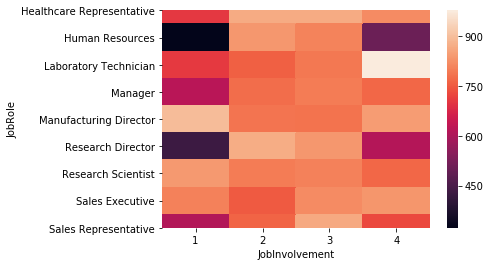

In [10]:
data = sns.heatmap(JobRole_rate)

In [17]:
avacado_data = pd.read_csv('avocado.csv')
avacado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


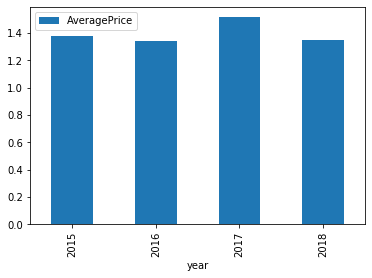

In [21]:
# визуализация средней цены на авакадо по годам
avacado_price = avacado_data[['year', 'AveragePrice']].groupby('year').mean()
avacado_price.plot(kind='bar')

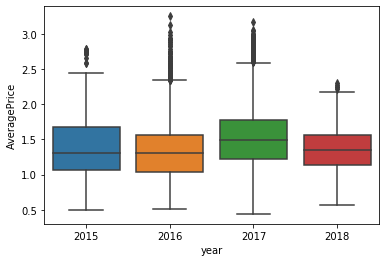

In [19]:
# визуализация разброса цены на авакадо по годам
avacado_price_1 = avacado_data[['year', 'AveragePrice']]
sns.boxplot(x="year", y="AveragePrice", data=avacado_price_1)